In [1]:
url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

In [2]:
fh=download(url, "covid.csv")

"covid.csv"

In [3]:
using CSV 
using DataFrames 

In [4]:
data=CSV.read("covid.csv", DataFrame)

,Province/State,Country/Region,Lat,Long,1/22/20
,String?,String,Float64?,Float64?,Int64
1,missing,Afghanistan,33.9391,67.71,0
2,missing,Albania,41.1533,20.1683,0
3,missing,Algeria,28.0339,1.6596,0
4,missing,Andorra,42.5063,1.5218,0
5,missing,Angola,-11.2027,17.8739,0
6,missing,Antigua and Barbuda,17.0608,-61.7964,0
7,missing,Argentina,-38.4161,-63.6167,0
8,missing,Armenia,40.0691,45.0382,0
9,Australian Capital Territory,Australia,-35.4735,149.012,0


In [5]:
all_countries=data[:, 2]

274-element Array{String,1}:
 "Afghanistan"
 "Albania"
 "Algeria"
 "Andorra"
 "Angola"
 "Antigua and Barbuda"
 "Argentina"
 "Armenia"
 "Australia"
 "Australia"
 "Australia"
 "Australia"
 "Australia"
 ⋮
 "United Kingdom"
 "United Kingdom"
 "United Kingdom"
 "Uruguay"
 "Uzbekistan"
 "Vanuatu"
 "Venezuela"
 "Vietnam"
 "West Bank and Gaza"
 "Yemen"
 "Zambia"
 "Zimbabwe"

In [6]:
countries=["Colombia", "US", "China", "Mexico", "Spain", "Australia"]

6-element Array{String,1}:
 "Colombia"
 "US"
 "China"
 "Mexico"
 "Spain"
 "Australia"

In [7]:
num_days=length(data[1, :])-4

404

In [8]:
countriesvector=zeros(length(countries), num_days)

6×404 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [9]:
function createarraycountrieszeros()
count=0
count2=0


for country in countries
    count2=count2+1
    for scountry in all_countries
        count=count + 1
        if scountry==country
            println(scountry, count)
            println(count2)
            count3=1
            for cell in data[count, 5:end]
                countriesvector[count2, count3]=countriesvector[count2, count3] + cell
                count3=count3+1
            end
            
        end
    
    end
    count=0
end
end

createarraycountrieszeros()


Colombia92
1
US250
2
China59
3
China60
3
China61
3
China62
3
China63
3
China64
3
China65
3
China66
3
China67
3
China68
3
China69
3
China70
3
China71
3
China72
3
China73
3
China74
3
China75
3
China76
3
China77
3
China78
3
China79
3
China80
3
China81
3
China82
3
China83
3
China84
3
China85
3
China86
3
China87
3
China88
3
China89
3
China90
3
China91
3
Mexico182
4
Spain234
5
Australia9
6
Australia10
6
Australia11
6
Australia12
6
Australia13
6
Australia14
6
Australia15
6
Australia16
6


In [10]:
data[234, :]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20
,String?,String,Float64?,Float64?,Int64,Int64,Int64,Int64
234,missing,Spain,40.4637,-3.74922,0,0,0,0


Change zeros to NaN 

In [11]:
countcountries=0
countcells=0
for country in countries 
    countcountries=countcountries+1
    for cell in countriesvector[countcountries, 1:end]
        countcells=countcells+1
        if cell==0
            countriesvector[countcountries, countcells]=NaN
        end
    end
    countcells=0
end


countriesvector


6×404 Array{Float64,2}:
 NaN    NaN    NaN     NaN     NaN    …       2.24814e6       2.25169e6
   1.0    1.0    2.0     2.0     5.0          2.85545e7       2.86057e7
 548.0  643.0  920.0  1406.0  2075.0     100924.0        100965.0
 NaN    NaN    NaN     NaN     NaN            2.08413e6       2.08694e6
 NaN    NaN    NaN     NaN     NaN            3.18855e6       3.18855e6
 NaN    NaN    NaN     NaN       4.0  …   28970.0         28978.0

In [12]:
using Plots
p=plot();

In [13]:
col_names=names(data)

408-element Array{String,1}:
 "Province/State"
 "Country/Region"
 "Lat"
 "Long"
 "1/22/20"
 "1/23/20"
 "1/24/20"
 "1/25/20"
 "1/26/20"
 "1/27/20"
 "1/28/20"
 "1/29/20"
 "1/30/20"
 ⋮
 "2/17/21"
 "2/18/21"
 "2/19/21"
 "2/20/21"
 "2/21/21"
 "2/22/21"
 "2/23/21"
 "2/24/21"
 "2/25/21"
 "2/26/21"
 "2/27/21"
 "2/28/21"

In [14]:
dates=string.(col_names)[5:end] #convert to strings (point for applaying to all elements )

404-element Array{String,1}:
 "1/22/20"
 "1/23/20"
 "1/24/20"
 "1/25/20"
 "1/26/20"
 "1/27/20"
 "1/28/20"
 "1/29/20"
 "1/30/20"
 "1/31/20"
 "2/1/20"
 "2/2/20"
 "2/3/20"
 ⋮
 "2/17/21"
 "2/18/21"
 "2/19/21"
 "2/20/21"
 "2/21/21"
 "2/22/21"
 "2/23/21"
 "2/24/21"
 "2/25/21"
 "2/26/21"
 "2/27/21"
 "2/28/21"

In [15]:
using Dates 

In [16]:
format=Dates.DateFormat("m/d/y")

dateformat"m/d/y"

In [17]:
parse.(Date, dates, format) + Year(2000)

404-element Array{Date,1}:
 2020-01-22
 2020-01-23
 2020-01-24
 2020-01-25
 2020-01-26
 2020-01-27
 2020-01-28
 2020-01-29
 2020-01-30
 2020-01-31
 2020-02-01
 2020-02-02
 2020-02-03
 ⋮
 2021-02-17
 2021-02-18
 2021-02-19
 2021-02-20
 2021-02-21
 2021-02-22
 2021-02-23
 2021-02-24
 2021-02-25
 2021-02-26
 2021-02-27
 2021-02-28

In [18]:
count=1
for country in countries
    mycountrydata=countriesvector[count, 1:end]
    plot!(dates,  mycountrydata, xticks=20, xrotation=45, size=[700,700], label=country, leg=:topleft)
    count=count+1
end


    

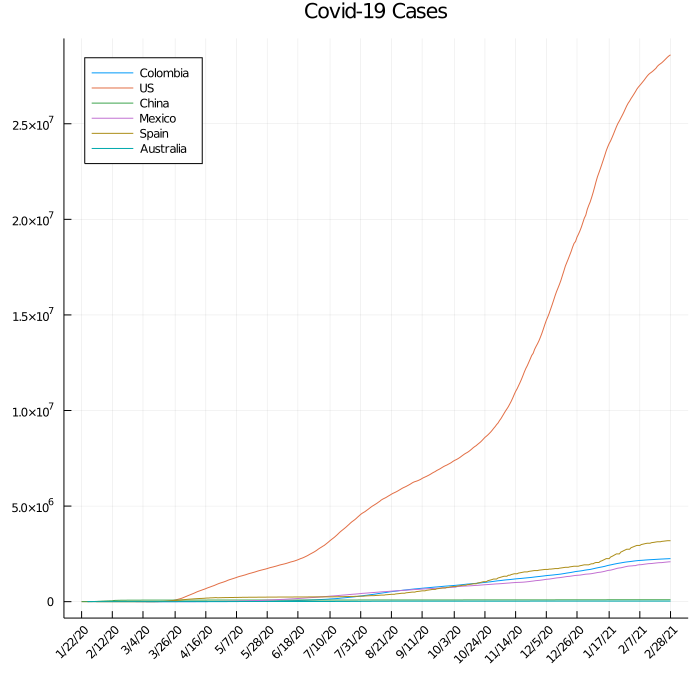

In [19]:
title!("Covid-19 Cases")
p

## Log10 Scale

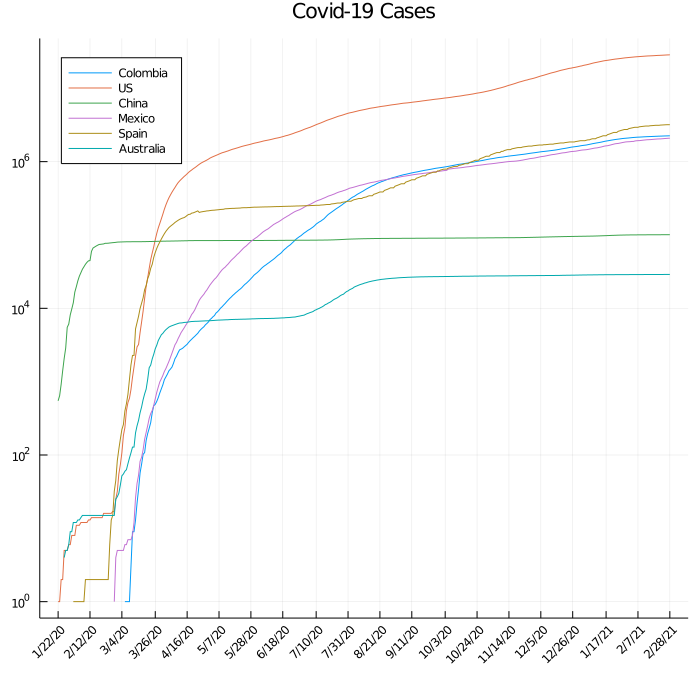

In [20]:
p=plot();
count=1
for country in countries
    mycountrydata=countriesvector[count, 1:end]
    plot!(dates,  mycountrydata, xticks=20, xrotation=45, size=[700,700], label=country, leg=:topleft, yscale=:log10)
    count=count+1
end
title!("Covid-19 Cases")
p

In [21]:
using Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-6703247851553737883\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-16137459441979249896\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-6703247851553737883\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [22]:
using WebIO


Press F5 if visualizations don´t work

In [72]:
num_days=length(dates)


@manipulate for day in 1:num_days
    a=1
    p=plot();
    for country in countries
        mycountrydata=countriesvector[a, 1:day]
        plot!(xlim=(0, num_days), dates[1:day],  mycountrydata, xticks=20, xrotation=45, size=[700,700], label=country, leg=:topleft, yscale=:log10)
        a=a+1
    end
    title!("Covid-19 Cases")
    p

end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["day"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 404,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
202, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\juana_000\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\juana_000\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\juana_000\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\juana_000\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\juana_000\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000014f485d0, Task (runnable) @0x0000000014f485d0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\

In [24]:
countriesvector

6×404 Array{Float64,2}:
 NaN    NaN    NaN     NaN     NaN    …       2.24814e6       2.25169e6
   1.0    1.0    2.0     2.0     5.0          2.85545e7       2.86057e7
 548.0  643.0  920.0  1406.0  2075.0     100924.0        100965.0
 NaN    NaN    NaN     NaN     NaN            2.08413e6       2.08694e6
 NaN    NaN    NaN     NaN     NaN            3.18855e6       3.18855e6
 NaN    NaN    NaN     NaN       4.0  …   28970.0         28978.0

In [25]:
weeklynewcases=zeros(length(countries), num_days)

6×404 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [26]:
countcountry=0
countday=0
for country in countries
    countcountry=countcountry +1
    for data in countriesvector[countcountry, 1:end]
        countday=countday+1
        condition=countday%7
        if condition==0 && countday !=0
            newcell=data - countriesvector[countcountry, countday-6]
            weeklynewcases[countcountry, countday]=newcell
        end
    end
    countday=0
end

weeklynewcases

6×404 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0   NaN    …   25888.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0     4.0     431106.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  4961.0        141.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0   NaN        38703.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0   NaN        54260.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0   NaN    …      27.0  0.0  0.0  0.0  0.0  0.0

In [27]:
countcountry=0
for country in countries
    countcountry=countcountry + 1
    weeklynewcases[countcountry, 7]=weeklynewcases[countcountry, 7] + countriesvector[countcountry, 1]
end


In [28]:
weeklynewcases

6×404 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0   NaN    …   25888.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0     5.0     431106.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  5509.0        141.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0   NaN        38703.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0   NaN        54260.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0   NaN    …      27.0  0.0  0.0  0.0  0.0  0.0

In [29]:
countcountries=0
countcells=0
for country in countries 
    countcountries=countcountries+1
    for cell in weeklynewcases[countcountries, 1:end]
        countcells=countcells+1
        if cell==0
            weeklynewcases[countcountries, countcells]=NaN
        end
    end
    countcells=0
end


weeklynewcases

6×404 Array{Float64,2}:
 NaN  NaN  NaN  NaN  NaN  NaN   NaN    …   25888.0  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN     5.0     431106.0  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  5509.0        141.0  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN   NaN        38703.0  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN   NaN        54260.0  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN   NaN    …      27.0  NaN  NaN  NaN  NaN  NaN

In [30]:
weeklynewcases[2, 203]

314037.0

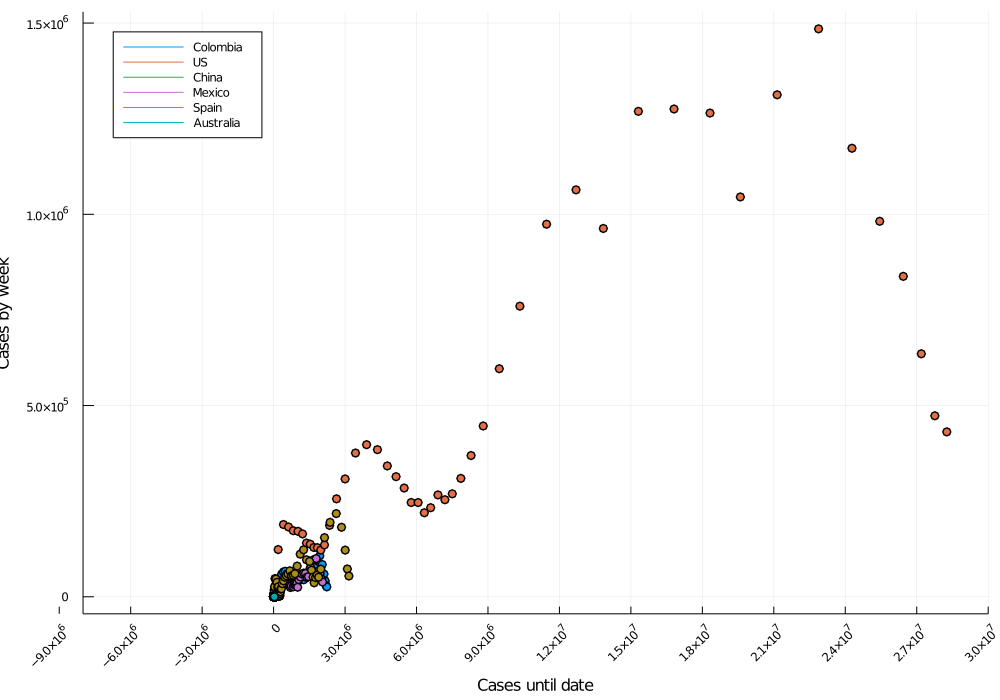

In [68]:
num_days=length(dates)
count=0
    p=plot();
    for country in countries
        count=count+1
        mycountrydata=countriesvector[count, 1:end]
        plot!(mycountrydata,  weeklynewcases[count, 1:end]  , xticks=20, xrotation=45, size=[1000,700],label=country, leg=:topleft, m=:o)
     end

p
xlabel!("Cases until date")
ylabel!("Cases by week")

In [70]:
num_days=length(dates)

@manipulate for day in 1:num_days
    a=1
    p=plot();
    for country in countries
        mycountrydata=countriesvector[a, 1:day]
        plot!(mycountrydata,  weeklynewcases[a, 1:day]  , xticks=20, xrotation=45, size=[1000, 700],label= country, leg=:topleft, m=:o)
       
        a=a+1
        
    end
    p
    xlabel!("Cases until date")
    ylabel!("Cases by week")

end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["day"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 404,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
202, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\juana_000\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\juana_000\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\juana_000\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\juana_000\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\juana_000\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000014f61430, Task (runnable) @0x0000000014f61430), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\